<a href="https://colab.research.google.com/github/shirin6767saleh/code-/blob/main/Eigen_basis_even_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let $F$ denote a discrete Fourier

*   List item
*   List item

Let \( F \) be the discrete Fourier transform (DFT) operator, which satisfies the following algebraic properties:

\begin{align*}
F^2 &= 1\oplus J_{n-1}, \\
F^4 &= I,
\end{align*}

where:

-  $J$ is the antidiagonal matrix,
-  $I$ is the identity matrix of appropriate dimension.


In [ ]:
import numpy as np
from numpy.linalg import norm
from scipy.linalg import block_diag

# === Parameters ===
m = 100
N = 2 * m
pi = np.pi
w = np.exp(-2j * pi / N)

# === Construct Identity and Symmetry Matrix ===
I = np.eye(N)
J_N = np.fliplr(np.eye(N, dtype=int))  # Reflection operator
J_N_1 = np.fliplr(np.eye(N - 1, dtype=int))
direct_sum_matrix = block_diag(1, J_N_1)
# === Construct  Matrix ّ ===
F = np.zeros((N, N), dtype=complex)
for k in range(N):
    F[k] = np.sqrt(1 / N) * np.array([
        w ** ((k ) * (l )) for l in range(N)
    ])

# === Matrix Powers ===
F2 = np.linalg.matrix_power(F, 2)
F4 = np.linalg.matrix_power(F, 4)
F3 = np.linalg.matrix_power(F,3)
F_H = np.conj(F).T
# === Identity Verification ===
print("\n--- Algebraic Identity Checks ---")

if np.allclose(F2, direct_sum_matrix, atol=1e-10):
    print("✅ F² = direct_sum_matrix")
else:
    print("❌ F² ≠ direct_sum_matrix")

if np.allclose(F3, F_H, atol=1e-10):
    print("✅ F³ = F_H confirmed")
else:
    print("❌ F³ ≠ F_H")

if np.allclose(F4, I, atol=1e-10):
    print("✅ F⁴ = I confirmed")
else:
    print("❌ F⁴ ≠ I")

print("----------------------------------\n")




--- Algebraic Identity Checks ---
✅ F² = direct_sum_matrix
✅ F³ = F_H confirmed
✅ F⁴ = I confirmed
----------------------------------



In [ ]:
FDCT = np.zeros_like(F)
FDST = np.zeros_like(F)

# === Construct FDCT and FDST ===
for k in range(N):
    FDCT[k] = (2 / np.sqrt(N)) * np.array([
        np.cos((k * l * 2 * np.pi) / N) for l in range(N)
    ])
    FDST[k] = (2 / np.sqrt(N)) * np.array([
        np.sin((k * l * 2 * np.pi) / N) for l in range(N)
    ])
# === Check the connection between FDCT and F ===

print("\n--- FDCT Connection Analysis ---")
if np.allclose(FDCT, F3 + F, atol=1e-10):
    print("✅ FDCT = F3 + F confirmed")
else:
    print("❌ FDCT ≠ F3 + F")

# === Part 1: FDCT Squared Identity ===
Square_FDCT = FDCT @ FDCT

print("\n--- FDCT Analysis ---")
if np.allclose(Square_FDCT, 2 * (I + F2), atol=1e-10):
    print("✅ FDCT² = 2·(I + F2) confirmed")
else:
    print("❌ FDCT² ≠ 2·(I + F2)")

# Eigenvalue spectrum of FDCT
eigvals_FDCT = np.unique(np.round(np.linalg.eigvals(FDCT), decimals=5))
print(f"Eigenvalues of FDCT: {eigvals_FDCT}")
print("*" * 40)


# === Check the connection between FDST and F ===

print("\n--- FDST Connection Analysis ---")
if np.allclose(FDST, 1j * (F - F3), atol=1e-10):
    print("✅ FDST = 1j * (F - F3) confirmed")
else:
    print("❌ FDST ≠ 1j * (F - F3)")


# === Part 2: FDST Squared Identity ===
Square_FDST = FDST @ FDST

print("\n--- FDST Analysis ---")
if np.allclose(Square_FDST, 2 * (I - F2), atol=1e-10):
    print("✅ FDST² = 2·(I - F2) confirmed")
else:
    print("❌ FDST² ≠ 2·(I + F2)")

# Eigenvalue spectrum of FDST
eigvals_FDST = np.unique(np.round(np.linalg.eigvals(FDST), decimals=5))
print(f"Eigenvalues of FDST: {eigvals_FDST}")
print("*" * 40)





--- FDCT Connection Analysis ---
✅ FDCT = F3 + F confirmed

--- FDCT Analysis ---
✅ FDCT² = 2·(I + F2) confirmed
Eigenvalues of FDCT: [-2.+0.j -0.-0.j  2.-0.j]
****************************************

--- FDST Connection Analysis ---
✅ FDST = 1j * (F - F3) confirmed

--- FDST Analysis ---
✅ FDST² = 2·(I - F2) confirmed
Eigenvalues of FDST: [-2.-0.j -0.+0.j  2.+0.j]
****************************************


In [ ]:
# === Construct FDCT and FDST ===
FDCT = np.zeros_like(F)
FDST = np.zeros_like(F)
for k in range(N):
    FDCT[k] = (2/np.sqrt(N)) * np.array([
        np.cos((k*l*2*np.pi)/N) for l in range(N)
    ])
    FDST[k] = (2/np.sqrt(N)) * np.array([
        np.sin((k*l*2*np.pi)/N) for l in range(N)
    ])
# === Verify algebraic decomposition of F ===
check1 = np.round(F3 + F - FDCT, 2)
check2 = np.round((1j * (F - F3)) - FDST, 2)

zero_matrix = np.zeros_like(F)
print("\n--- Decomposition Verification ---")
if np.allclose(check1, zero_matrix) and np.allclose(check2, zero_matrix):
    print("✅ F3 + F = FDCT and 1j * (F - F3) = FDST confirmed")
else:
    print("❌ Decomposition mismatch detected")
print("----------------------------------")

# === Construct eigenspace components ===
Eig_pos1 = (I + direct_sum_matrix) + FDCT       # eigval +1
Eig_neg1 = (I + direct_sum_matrix) - FDCT       # eigval -1
Eig_posi = (I - direct_sum_matrix) - FDST       # eigval +i
Eig_negi = (I - direct_sum_matrix) + FDST       # eigval -i

# === Verify eigenvalue equations Fv = λv ===
print("\n--- Eigenvalue Verification ---")
def check_eigvec(eig_matrix, expected, label):
    if np.allclose(F @ eig_matrix, expected * eig_matrix, atol=1e-2):
        print(f"✅ EigVecs confirmed for eigenvalue {label}")
    else:
        print(f"❌ EigVecs failed for eigenvalue {label}")

check_eigvec(Eig_pos1,  1,   "+1")
check_eigvec(Eig_neg1, -1,   "-1")
check_eigvec(Eig_posi,  1j,  "+i")
check_eigvec(Eig_negi, -1j,  "-i")
print("----------------------------------")

# === Construct normalized projection matrices ===
Proj_pos1 = (1/4) * Eig_pos1
Proj_neg1 = (1/4) * Eig_neg1
Proj_posi = (1/4) * Eig_posi
Proj_negi = (1/4) * Eig_negi

# === Check idempotence: P^2 = P ===
print("\n--- Idempotence Checks for Projectors ---")
def check_idempotent(P, label):
    if np.allclose(P @ P, P, atol=1e-2):
        print(f"✅ Proj_{{{label}}} is idempotent")
    else:
        print(f"❌ Proj_{{{label}}} is not idempotent")

check_idempotent(Proj_pos1, "+1")
check_idempotent(Proj_neg1, "-1")
check_idempotent(Proj_posi, "+i")
check_idempotent(Proj_negi, "-i")
print("------------------------------------------\n")

# === Final identity decomposition check ===
identity_operator = Proj_pos1 + Proj_neg1 + Proj_posi + Proj_negi

print("\n--- Identity Decomposition Check ---")
if np.allclose(np.eye(N), identity_operator, atol=1e-2):
    print("✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed")
else:
    print("❌ Identity cannot be decomposed into spectral projections")
print("------------------------------------------")



--- Decomposition Verification ---
✅ F3 + F = FDCT and 1j * (F - F3) = FDST confirmed
----------------------------------

--- Eigenvalue Verification ---
✅ EigVecs confirmed for eigenvalue +1
✅ EigVecs confirmed for eigenvalue -1
✅ EigVecs confirmed for eigenvalue +i
✅ EigVecs confirmed for eigenvalue -i
----------------------------------

--- Idempotence Checks for Projectors ---
✅ Proj_{+1} is idempotent
✅ Proj_{-1} is idempotent
✅ Proj_{+i} is idempotent
✅ Proj_{-i} is idempotent
------------------------------------------


--- Identity Decomposition Check ---
✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed
------------------------------------------


# Block Forms of FDCT and FDST for Even-Length Signals
# The Square of FDCT and FDST
# Eigvals of FDCT and FDST


In [25]:
import numpy as np
from numpy.linalg import norm
from scipy.linalg import block_diag

# === Parameters ===
m = 100
N = 2 * m
pi = np.pi
w = np.exp(-2j * pi / N)
 # === F generation ===

F = np.zeros((N, N), dtype=complex)
for k in range(N):
    F[k] = np.sqrt(1 / N) * np.array([
        w ** ((k ) * (l )) for l in range(N)
    ])
 # === FDST generation ===

FDST = np.zeros_like(F)
for k in range(N):
 FDST[k] = (2/np.sqrt(N)) * np.array([
        np.sin((k*l*2*np.pi)/N) for l in range(N)
    ])


 # === FDCT generation ===
FDCT = np.zeros((N, N), dtype=complex)
for k in range(N):
    FDCT[k] = np.array([
        np.cos((k * l * 2 * pi) / N) for l in range(N)
    ])

# === Define reflection matrix J_m ===
J_m_1 = np.fliplr(np.eye(m - 1))
# === Define Zeros (zero matrix) ===
Z_N = np.zeros(N)
Z_row = np.zeros((1, m - 1))
Z_col = np.zeros((m - 1, 1))
# === Extract the components for even case ===
C_even = FDCT[1:m, 1:m]
S_even = FDST[1:m, 1:m]
# === Reconstruct FDCT ===
recon_FDCT = np.zeros((N, N), dtype=complex)
recon_FDCT[0, :] = 1
recon_FDCT[:, 0] = 1
recon_FDCT[m, :] = (-1) ** np.arange(N)
recon_FDCT[:, m] = (-1) ** np.arange(N)
recon_FDCT[1:m, 1:m] = C_even
recon_FDCT[1:m, m+1:] = C_even @ J_m_1
recon_FDCT[m+1:, 1:m] = J_m_1 @ C_even
recon_FDCT[m+1:, m+1:] = J_m_1 @ C_even @ J_m_1

# === Reconstruct FDST ===
recon_FDST = np.block([
    [         0, Z_row,           0,            Z_row],
    [Z_col,   S_even,         Z_col,     -S_even @ J_m_1],
    [0,       Z_row,             0,            Z_row],
    [Z_col, -J_m_1 @ S_even, Z_col,  J_m_1 @ S_even @ J_m_1]
]).astype(complex)

# === Validate ===
print("FDCT shape:", FDCT.shape, "| C_even shape:", C_even.shape)
print("FDCT ≈ reconstructed FDCT?")
print("Comparison result:", np.allclose(FDCT, recon_FDCT, atol=1e-10))
print("*" * 40)

print("C_even =\n", C_even)
print(S_even)
print("FDST shape:", FDST.shape, "| S_even shape:", S_even.shape)
print("FDST ≈ reconstructed FDST?")
print("Comparison result:", np.allclose(FDST, recon_FDST, atol=1e-2))
print("*" * 40)

FDCT shape: (200, 200) | C_even shape: (99, 99)
FDCT ≈ reconstructed FDCT?
Comparison result: True
****************************************
C_even =
 [[ 0.99950656+0.j  0.99802673+0.j  0.99556196+0.j ... -0.99556196+0.j
  -0.99802673+0.j -0.99950656+0.j]
 [ 0.99802673+0.j  0.9921147 +0.j  0.98228725+0.j ...  0.98228725+0.j
   0.9921147 +0.j  0.99802673+0.j]
 [ 0.99556196+0.j  0.98228725+0.j  0.96029369+0.j ... -0.96029369+0.j
  -0.98228725+0.j -0.99556196+0.j]
 ...
 [-0.99556196+0.j  0.98228725+0.j -0.96029369+0.j ...  0.96029369+0.j
  -0.98228725+0.j  0.99556196+0.j]
 [-0.99802673+0.j  0.9921147 +0.j -0.98228725+0.j ... -0.98228725+0.j
   0.9921147 +0.j -0.99802673+0.j]
 [-0.99950656+0.j  0.99802673+0.j -0.99556196+0.j ...  0.99556196+0.j
  -0.99802673+0.j  0.99950656+0.j]]
[[ 0.00444215+0.j  0.00887992+0.j  0.01330893+0.j ...  0.01330893+0.j
   0.00887992+0.j  0.00444215+0.j]
 [ 0.00887992+0.j  0.0177248 +0.j  0.02649972+0.j ... -0.02649972+0.j
  -0.0177248 +0.j -0.00887992+0.j]
 [ 0

In [41]:
# === construct zebra_diff_matrix === #
zebra_diff_matrix = np.zeros((m-1, m-1))
np.fill_diagonal(zebra_diff_matrix, (m - 2) / 2)

for i in range(m-1):
    for j in range(m-1):
        if i != j and abs(i - j) % 2 == 0:
            zebra_diff_matrix[i, j] = -1
# === Extract the components for even case ===
C_even = FDCT[1:m, 1:m]
S_even = FDST[1:m, 1:m]
# === Compute squares of C_even and S_even ===
C_even_squared = C_even @ C_even
S_even_squared = S_even @ S_even

print("Is C_even^2 ≈ zebra_diff_matrix?")
print(np.allclose(C_even_squared, zebra_diff_matrix, atol=1e-2))

print("Is S_even @ S_even ≈ I_m?")
print(np.allclose(S_even_squared, np.eye(m - 1), atol=1e-2))
# === Compute eigenvalues ===
eigvals_C_even = np.unique(np.round(np.linalg.eigvals(C_even), 4))
eigvals_S_even = np.unique(np.round(np.linalg.eigvals(S_even), 4))

print("Eigenvalues of C_even (FDCT):")
print(eigvals_C_even)
print("Eigenvalues of S_even (FDST):")
print(eigvals_S_even)
print("*" * 40)

Is C_even^2 ≈ zebra_diff_matrix?
True
Is S_even @ S_even ≈ I_m?
True
Eigenvalues of S_even (FDST):
[-1.+0.j  1.+0.j]
****************************************


#Verification and Construction of Eigenbases for $C_{\text{even}}$ and $FrDCT$ coressponded to +1 and +2

In [ ]:
# === Perturb C_even and S_even by ± identity ===
perturbed_C_plus1   = C_even + np.eye(m)
perturbed_C_minus1  = C_even - np.eye(m)
perturbed_S_plus1   = S_even + np.eye(m)
perturbed_S_minus1  = S_even - np.eye(m)

# === Extract candidate eigenvectors for λ = ±1 ===
eigvecs_C_plus1     = perturbed_C_plus1[:, :m // 2]
eigvecs_C_minus1    = perturbed_C_minus1[:, :m // 2]
eigvecs_S_plus1     = perturbed_S_plus1[:, :m // 2]
eigvecs_S_minus1    = perturbed_S_minus1[:, :m // 2]

# === Check eigenvectors for C_even ===
print("\033[94m# ======= Check eigenvalue ±1: C_even =====#\033[0m")
if np.allclose(C_even @ eigvecs_C_plus1 - eigvecs_C_plus1, 0):
    print("✅ eigvecs_C_plus1: Eigenbasis for λ=1 of C_even")
else:
    print("⚠️  eigvecs_C_plus1: Not an eigenbasis for λ=1 of C_even")

if np.allclose(C_even @ eigvecs_C_minus1 + eigvecs_C_minus1, 0):
    print("✅ eigvecs_C_minus1: Eigenbasis for λ=-1 of C_even")
else:
    print("⚠️  eigvecs_C_minus1: Not an eigenbasis for λ=-1 of C_even")

# === Check eigenvectors for S_even ===
print("\033[94m# ======= Check eigenvalue ±1: S_even =====#\033[0m")
if np.allclose(S_even @ eigvecs_S_plus1 - eigvecs_S_plus1, 0):
    print("✅ eigvecs_S_plus1: Eigenbasis for λ=1 of S_even")
else:
    print("⚠️  eigvecs_S_plus1: Not an eigenbasis for λ=1 of S_even")

if np.allclose(S_even @ eigvecs_S_minus1 + eigvecs_S_minus1, 0):
    print("✅ eigvecs_S_minus1: Eigenbasis for λ=-1 of S_even")
else:
    print("⚠️  eigvecs_S_minus1: Not an eigenbasis for λ=-1 of S_even")

# === Extend eigenvectors to full domain for FrDCT and FrDST ===
ext_eigvecs_C_plus2   = np.vstack([eigvecs_C_plus1,  -J_m @ eigvecs_C_plus1])
ext_eigvecs_C_minus2  = np.vstack([eigvecs_C_minus1, -J_m @ eigvecs_C_minus1])
ext_eigvecs_S_plus2   = np.vstack([eigvecs_S_plus1,   J_m @ eigvecs_S_plus1])
ext_eigvecs_S_minus2  = np.vstack([eigvecs_S_minus1,  J_m @ eigvecs_S_minus1])

# === Check eigenvalue ±2 for FrDCT and FrDST ===
print("\033[94m# == Check eigenvalue ±2 for FrDCT and FrDST ==#\033[0m")

# --- FrDCT checks ---
if np.allclose(FrDCT @ ext_eigvecs_C_plus2 - 2 * ext_eigvecs_C_plus2, 0):
    print("✅ ext_eigvecs_C_plus2: Eigenbasis for λ=2 of FrDCT")
else:
    print("⚠️  ext_eigvecs_C_plus2: Not an eigenbasis for λ=2 of FrDCT")

if np.allclose(FrDCT @ ext_eigvecs_C_minus2 + 2 * ext_eigvecs_C_minus2, 0):
    print("✅ ext_eigvecs_C_minus2: Eigenbasis for λ=-2 of FrDCT")
else:
    print("⚠️  ext_eigvecs_C_minus2: Not an eigenbasis for λ=-2 of FrDCT")

# --- FrDST checks ---
if np.allclose(FrDST @ ext_eigvecs_S_plus2 - 2 * ext_eigvecs_S_plus2, 0):
    print("✅ ext_eigvecs_S_plus2: Eigenbasis for λ=2 of FrDST")
else:
    print("⚠️  ext_eigvecs_S_plus2: Not an eigenbasis for λ=2 of FrDST")

if np.allclose(FrDST @ ext_eigvecs_S_minus2 + 2 * ext_eigvecs_S_minus2, 0):
    print("✅ ext_eigvecs_S_minus2: Eigenbasis for λ=-2 of FrDST")
else:
    print("⚠️  ext_eigvecs_S_minus2: Not an eigenbasis for λ=-2 of FrDST")

print("*" * 55)

# === Check eigenvectors for G ===
print("\033[94m# == Check eigenvalue +1 for G ==#\033[0m")
if np.allclose(  G @ ext_eigvecs_C_plus2 - ext_eigvecs_C_plus2, 0):
    print("✅ ext_eigvecs_C_plus2: Eigenbasis for λ=1 of G")
else:
    print("\033[91m⚠️  ext_eigvecs_C_plus2: Not an eigenbasis for λ=1 of G\033[0m")

print("\033[94m# == Check eigenvalue -1 for G ==#\033[0m")
if np.allclose(  G @ ext_eigvecs_C_minus2 + ext_eigvecs_C_minus2, 0):
    print("✅ ext_eigvecs_C_minus2: Eigenbasis for λ=-1 of G")
else:
    print("\033[91m⚠️  ext_eigvecs_C_minus2: Not an eigenbasis for λ=1 of G\033[0m")

print("\033[94m# == Check eigenvalue +i for G ==#\033[0m")
if np.allclose(  G @ ext_eigvecs_S_plus2 + 1j*ext_eigvecs_S_plus2, 0):
    print("✅ ext_eigvecs_S_plus2: Eigenbasis for λ=+i of G")
else:
    print("\033[91m⚠️  ext_eigvecs_S_plus2: Not an eigenbasis for λ=+i of G\033[0m")

print("\033[94m# == Check eigenvalue -1 for G ==#\033[0m")
if np.allclose(  G @ ext_eigvecs_S_minus2 -1j* ext_eigvecs_S_minus2, 0):
    print("✅ ext_eigvecs_C_plus2: Eigenbasis for λ=-i of G")
else:
    print("\033[91m⚠️  ext_eigvecs_C_plus2: Not an eigenbasis for λ=-i of G\033[0m")


# ======= Check eigenvalue ±1: C_even =====#
✅ eigvecs_C_plus1: Eigenbasis for λ=1 of C_even
✅ eigvecs_C_minus1: Eigenbasis for λ=-1 of C_even
# ======= Check eigenvalue ±1: S_even =====#
✅ eigvecs_S_plus1: Eigenbasis for λ=1 of S_even
✅ eigvecs_S_minus1: Eigenbasis for λ=-1 of S_even
# == Check eigenvalue ±2 for FrDCT and FrDST ==#
✅ ext_eigvecs_C_plus2: Eigenbasis for λ=2 of FrDCT
✅ ext_eigvecs_C_minus2: Eigenbasis for λ=-2 of FrDCT
✅ ext_eigvecs_S_plus2: Eigenbasis for λ=2 of FrDST
✅ ext_eigvecs_S_minus2: Eigenbasis for λ=-2 of FrDST
*******************************************************
# == Check eigenvalue +1 for G ==#
✅ ext_eigvecs_C_plus2: Eigenbasis for λ=1 of G
# == Check eigenvalue -1 for G ==#
✅ ext_eigvecs_C_minus2: Eigenbasis for λ=-1 of G
# == Check eigenvalue +i for G ==#
✅ ext_eigvecs_S_plus2: Eigenbasis for λ=+i of G
# == Check eigenvalue -1 for G ==#
✅ ext_eigvecs_C_plus2: Eigenbasis for λ=-i of G


In [ ]:
# === Extend eigenvectors to full domain for FrDCT and FrDST ===
ext_eigvecs_C_plus2   = np.vstack([eigvecs_C_plus1,  -J_m @ eigvecs_C_plus1])
ext_eigvecs_C_minus2  = np.vstack([eigvecs_C_minus1, -J_m @ eigvecs_C_minus1])
ext_eigvecs_S_plus2   = np.vstack([eigvecs_S_plus1,   J_m @ eigvecs_S_plus1])
ext_eigvecs_S_minus2  = np.vstack([eigvecs_S_minus1,  J_m @ eigvecs_S_minus1])


# === Eigenmatrix blocks for each eigenvalue ===
Eig_G1    = ((I - J_N) + FrDCT)[:, :m//2]
Eig_G_neg1 = ((I - J_N) - FrDCT)[:, :m//2]
Eig_G_posi = ((I + J_N) - FrDST)[:, :m//2]
Eig_G_negi = ((I + J_N) + FrDST)[:, :m//2]


def show_diff(name1, name2, A, B):
    print(f"🔍 Max abs diff between {name1} and {name2}: {np.max(np.abs(A - B)):.3e}")
    print(f"🔍 Frobenius norm of difference: {np.linalg.norm(A - B):.3e}\n")

print("\n\033[95m--- Eigenbasis Verification ---\033[0m")

# λ = +1
if np.allclose(Eig_G1, ext_eigvecs_C_plus2, atol=1e-3):
    print("✅ Eig_G1 ≈ ext_eigvecs_C_plus2 (λ = +1)")
else:
    print("❌ Eig_G1 ≠ ext_eigvecs_C_plus2 (λ = +1)")
    show_diff("Eig_G1", "ext_eigvecs_C_plus2", Eig_G1, ext_eigvecs_C_plus2)

print("--"*35)

# λ = -1
if np.allclose(Eig_G_neg1, ext_eigvecs_C_minus2, atol=1e-3):
    print("✅ Eig_G_neg1 ≈ ext_eigvecs_C_minus2 (λ = -1)")
else:
    print("❌ Eig_G_neg1 ≠ ext_eigvecs_C_minus2 (λ = -1)")
    show_diff("Eig_G_neg1", "ext_eigvecs_C_minus2", Eig_G_neg1, ext_eigvecs_C_minus2)
print("--"*35)

# λ = +i
if np.allclose(Eig_G_posi, ext_eigvecs_S_plus2, atol=1e-3):
    print("✅ Eig_G_posi ≈ ext_eigvecs_S_plus2 (λ = +i)")
else:
    print("❌ Eig_G_posi ≠ ext_eigvecs_S_plus2 (λ = +i)")
    show_diff("Eig_G_posi", "ext_eigvecs_S_plus2", Eig_G_posi, ext_eigvecs_S_plus2)
print("--"*35)

# λ = -i
if np.allclose(Eig_G_negi, ext_eigvecs_S_minus2, atol=1e-3):
    print("✅ Eig_G_negi ≈ ext_eigvecs_S_minus2 (λ = -i)")
else:
    print("❌ Eig_G_negi ≠ ext_eigvecs_S_minus2 (λ = -i)")
    show_diff("Eig_G_negi", "ext_eigvecs_S_minus2", Eig_G_negi, ext_eigvecs_S_minus2)

print("\033[90m" + "-"*45 + "\033[0m")



--- Eigenbasis Verification ---
✅ Eig_G1 ≈ ext_eigvecs_C_plus2 (λ = +1)
----------------------------------------------------------------------
❌ Eig_G_neg1 ≠ ext_eigvecs_C_minus2 (λ = -1)
🔍 Max abs diff between Eig_G_neg1 and ext_eigvecs_C_minus2: 2.282e+00
🔍 Frobenius norm of difference: 2.814e+01

----------------------------------------------------------------------
❌ Eig_G_posi ≠ ext_eigvecs_S_plus2 (λ = +i)
🔍 Max abs diff between Eig_G_posi and ext_eigvecs_S_plus2: 2.828e-01
🔍 Frobenius norm of difference: 2.000e+01

----------------------------------------------------------------------
❌ Eig_G_negi ≠ ext_eigvecs_S_minus2 (λ = -i)
🔍 Max abs diff between Eig_G_negi and ext_eigvecs_S_minus2: 2.000e+00
🔍 Frobenius norm of difference: 2.000e+01

---------------------------------------------


In [ ]:
k_max = N // 4
n = np.arange(N)

# Initialize eigenvector storage
y1   = np.zeros((k_max + 1, N))  # Eigenvalue +1
yn1  = np.zeros((k_max + 1, N))  # Eigenvalue -1
yi   = np.zeros((k_max + 1, N), dtype=complex)  # Eigenvalue +i
yni  = np.zeros((k_max + 1, N), dtype=complex)  # Eigenvalue -i

# Track success
message1 = True
message2 = True
messagei = True
messageni = True

for k in range(k_max + 1):
    xk = (2 / np.sqrt(N)) * np.cos((2 * n + 1) * (2 * k + 1) * np.pi / (2 * N))
    zk = (2 / np.sqrt(N)) * np.sin((2 * n + 1) * (2 * k + 1) * np.pi / (2 * N))

    delta_k = np.zeros(N)
    delta_k[k] = 1
    delta_Nk = np.zeros(N)
    delta_Nk[N - k - 1] = 1

    # Construct eigenvectors
    y1[k]   = xk + delta_k - delta_Nk       # λ = +1
    yn1[k]  = xk - delta_k + delta_Nk       # λ = -1
    yi[k]   = zk -  (delta_k + delta_Nk)  # λ = +i
    yni[k]  = zk +  (delta_k + delta_Nk)  # λ = -i

    # Check eigenvalue +1
    if not np.allclose(G @ y1[k], y1[k], atol=1e-6):
        message1 = False
        print(f"❌ y1[k={k}] failed eigenvector check for λ = +1")

    # Check eigenvalue -1
    if not np.allclose(G @ yn1[k], -yn1[k], atol=1e-6):
        message2 = False
        print(f"❌ yn1[k={k}] failed eigenvector check for λ = -1")

    # Check eigenvalue +i
    if not np.allclose(G @ yi[k], 1j * yi[k], atol=1e-6):
        messagei = False
        print(f"❌ yi[k={k}] failed eigenvector check for λ = +i")

    # Check eigenvalue -i
    if not np.allclose(G @ yni[k], -1j * yni[k], atol=1e-6):
        messageni = False
        print(f"❌ yni[k={k}] failed eigenvector check for λ = -i")

# Summary
if message1:
    print("✅ All y1 vectors confirmed for λ = +1")
if message2:
    print("✅ All yn1 vectors confirmed for λ = -1")
if messagei:
    print("✅ All yi vectors confirmed for λ = +i")
if messageni:
    print("✅ All yni vectors confirmed for λ = -i")


✅ All y1 vectors confirmed for λ = +1
✅ All yn1 vectors confirmed for λ = -1
✅ All yi vectors confirmed for λ = +i
✅ All yni vectors confirmed for λ = -i


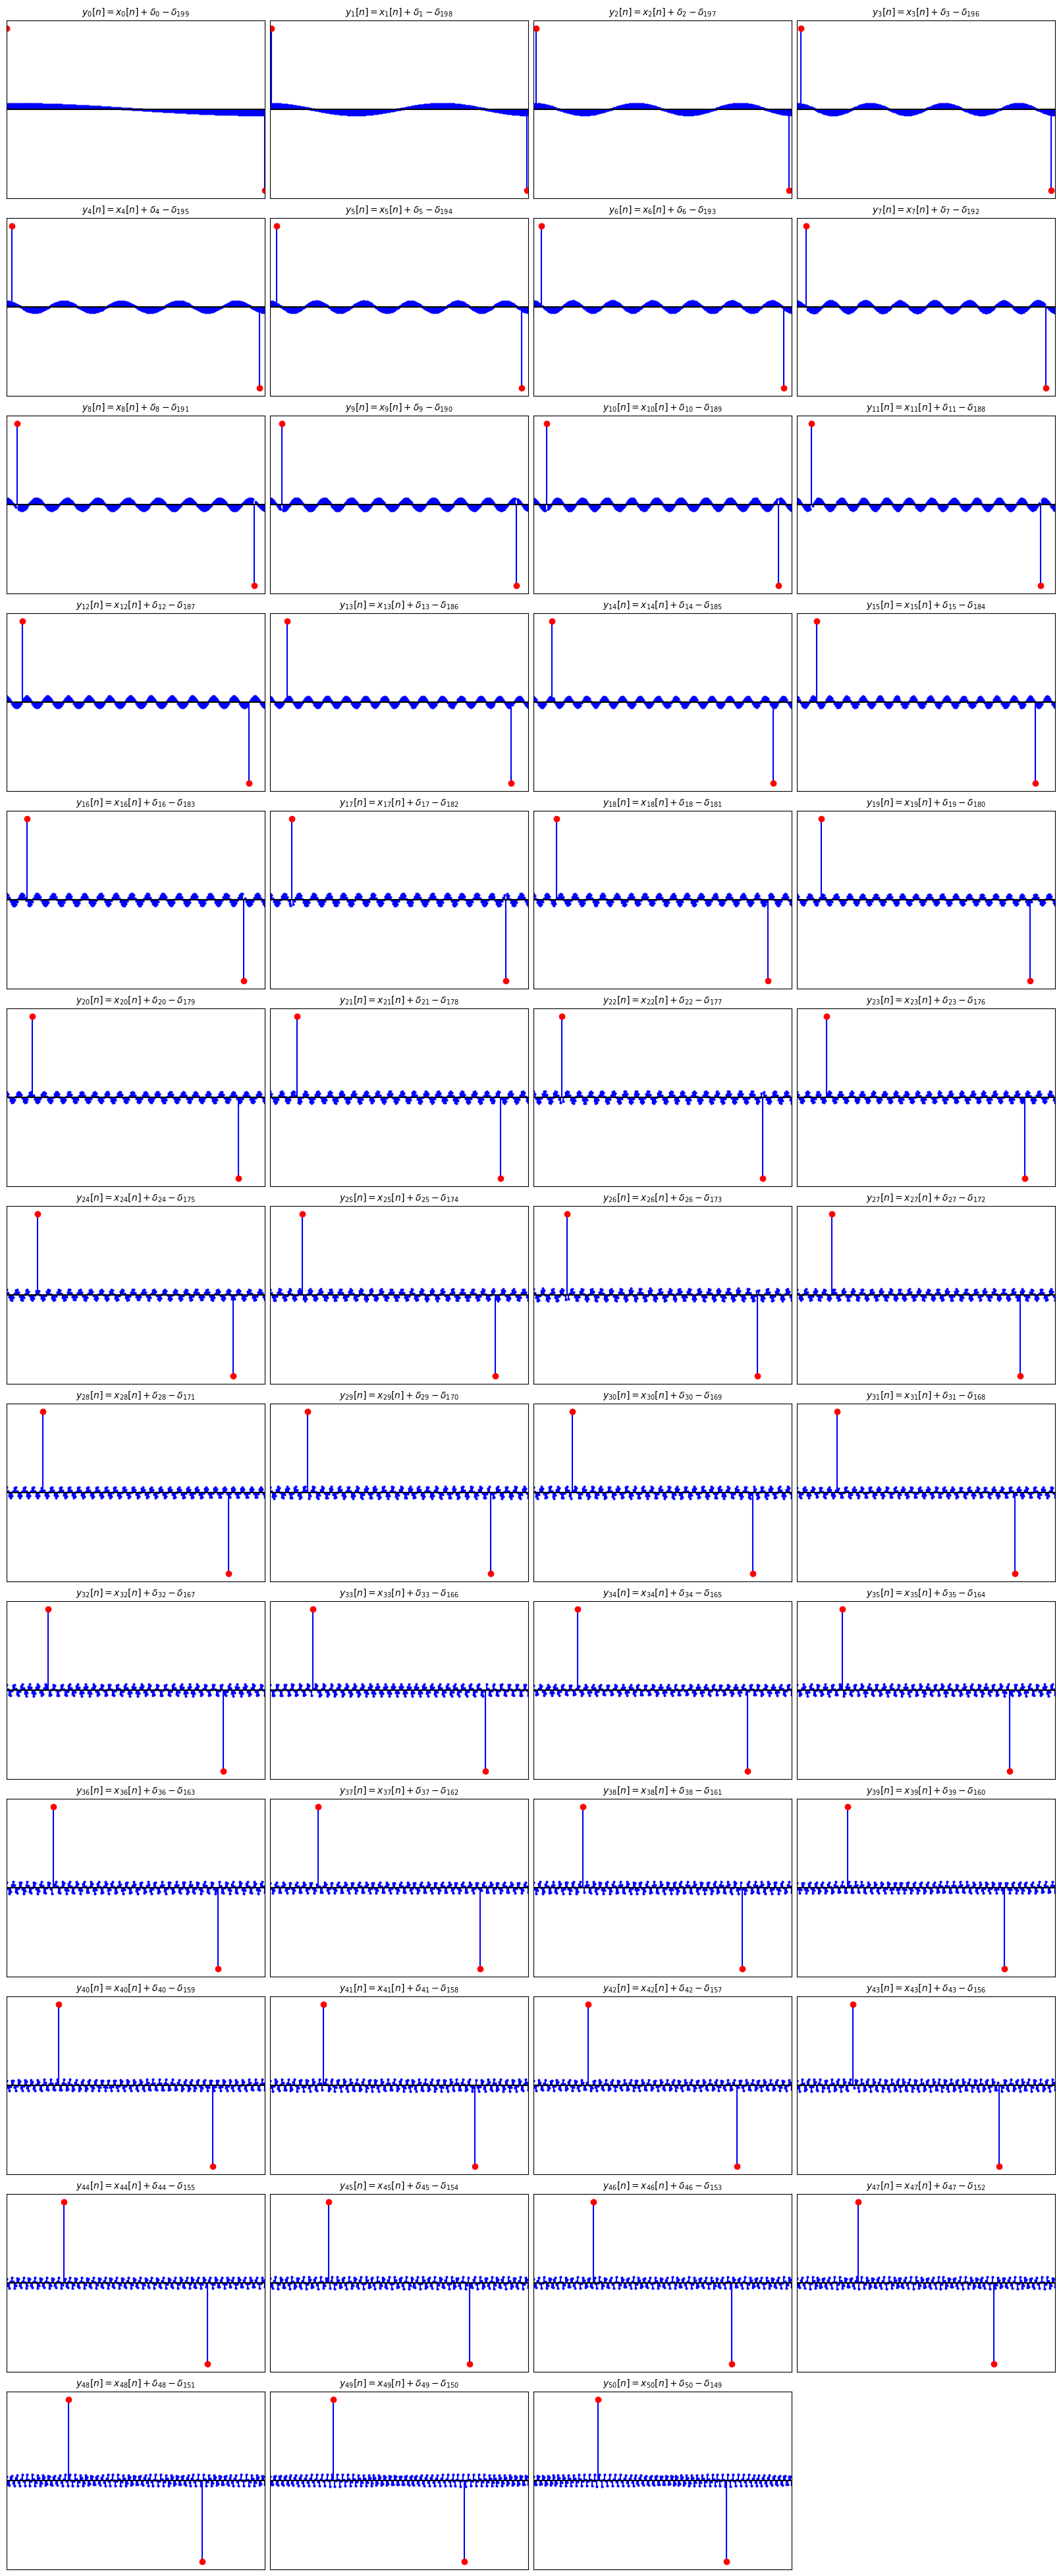

In [ ]:

# Plot all y_k's in 4 columns
cols = 4
rows = (k_max + 1 + cols - 1) // cols  # ceiling division

fig, axs = plt.subplots(rows, cols, figsize=(16, 3*rows), constrained_layout=True)
axs = axs.flatten()

for k in range(k_max + 1):
    # Plot main stem plot in blue with small markers
    markerline, stemlines, baseline = axs[k].stem(n, y_k[k], linefmt='b-', markerfmt='bo', basefmt='k-')
    markerline.set_markersize(2)

    # Highlight delta_k in red (positive spike)
    axs[k].plot(k, y_k[k, k], 'ro', markersize=6)  # delta_k point

    # Highlight delta_{N-k-1} in red (negative spike)
    axs[k].plot(N - k - 1, y_k[k, N - k - 1], 'ro', markersize=6)  # delta_{N-k-1} point

    axs[k].set_title(f'$y_{{{k}}}[n] = x_{{{k}}}[n] + \\delta_{{{k}}} - \\delta_{{{N-k-1}}}$', fontsize=10)
    axs[k].set_xlim(0, N-1)
    axs[k].grid(True)
    axs[k].set_xticks([])
    axs[k].set_yticks([])

# Hide any unused subplots
for i in range(k_max + 1, len(axs)):
    fig.delaxes(axs[i])



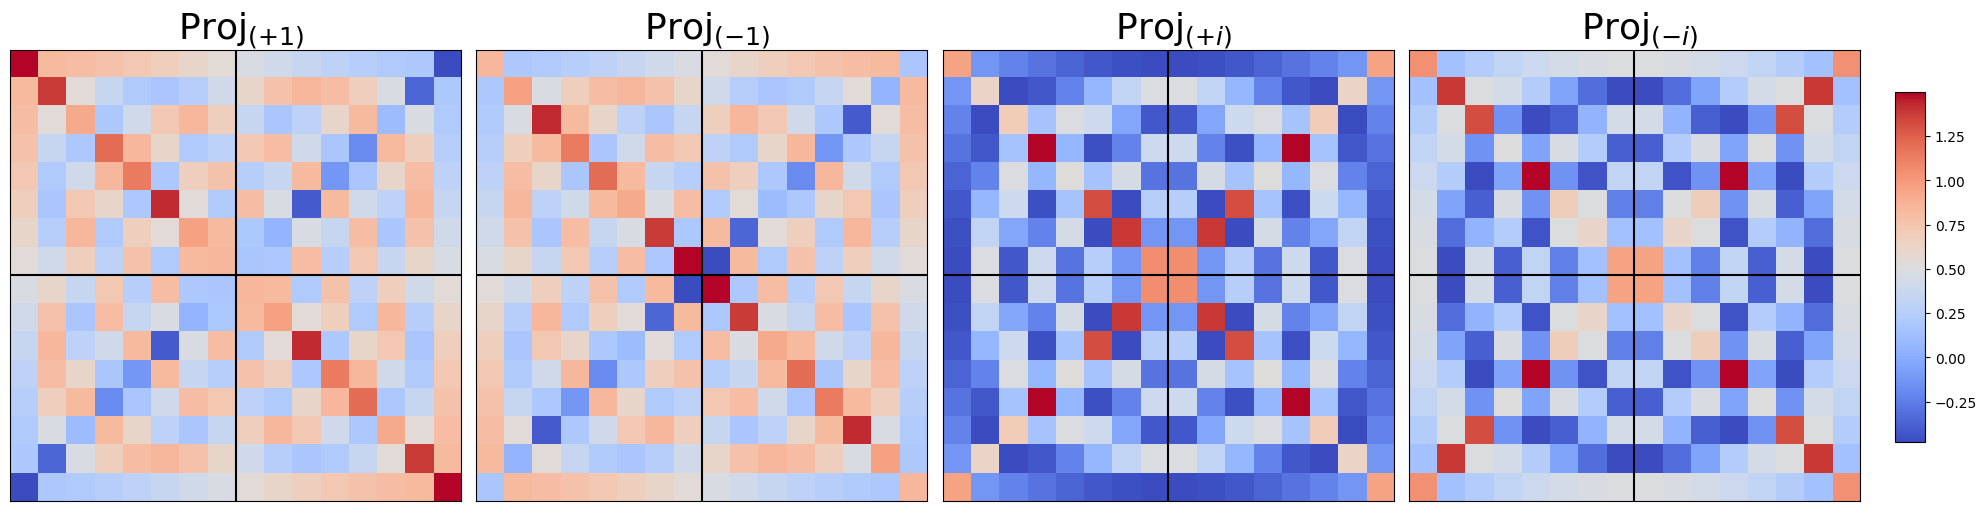

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix size (even)
N = 16
center = N // 2

# Construct I and J_N
I = np.eye(N)
J_N = np.fliplr(np.eye(N))

# Construct cos_G and sin_G
cos_G = np.zeros((N, N))
sin_G = np.zeros((N, N))
for k in range(N):
    cos_G[k, :] = (2 / np.sqrt(N)) * np.array([
        np.cos(((k + 0.5) * (l + 0.5) * 2 * np.pi) / N) for l in range(N)
    ])
    sin_G[k, :] = (2 / np.sqrt(N)) * np.array([
        np.sin(((k + 0.5) * (l + 0.5) * 2 * np.pi) / N) for l in range(N)
    ])

# Define Eig matrices
Eig1 = (I - J_N) + cos_G
Eig_n1 = (I - J_N) - cos_G
Eig_i = (I + J_N) - sin_G
Eig_ni = (I + J_N) + sin_G

# Dictionary of matrices with enlarged labels
matrices = {
    r"$\text{ Proj}_{(+1)}$": Eig1,
    r"$\text{ Proj}_{(-1)}$": Eig_n1,
    r"$\text{ Proj}_{(+i)}$": Eig_i,
    r"$\text{ Proj}_{(-i)}$": Eig_ni,
}

# Create a 1x4 grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot each matrix
for ax, (title, mat) in zip(axs, matrices.items()):
    im = ax.imshow(mat, cmap='coolwarm')
    ax.set_title(title, fontsize=26)
    ax.axhline(center - 0.5, color='black', linewidth=1.5)
    ax.axvline(center - 0.5, color='black', linewidth=1.5)
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout and add colorbar to the right
plt.tight_layout(rect=[0, 0, 0.94, 1])
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig("projection_heatmaps.pdf", format='pdf')

#plt.suptitle('Heatmaps of Projection Operators', fontsize=20, y=1.05)
plt.show()


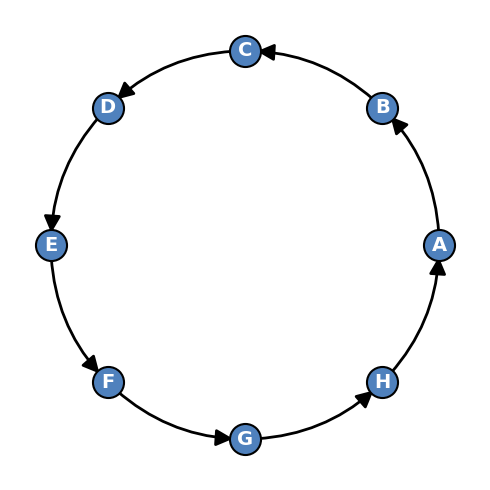

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()
num_nodes = 8
edges = [(i, (i + 1) % num_nodes) for i in range(num_nodes)]
G.add_edges_from(edges)

# Use circular layout
pos = nx.circular_layout(G)

# Set up figure
plt.figure(figsize=(5, 5))

# Draw nodes with custom style
nx.draw_networkx_nodes(G, pos,
                       node_size=500,
                       node_color="#4F81BD",
                       edgecolors='black',
                       linewidths=1.5)

# Use custom labels: A to H
labels = {i: chr(65 + i) for i in range(num_nodes)}  # A-H
nx.draw_networkx_labels(G, pos, labels,
                        font_size=14,
                        font_color='white',
                        font_weight='bold')

# Draw edges with curved arrows for clarity
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
                       edge_color='black',
                       connectionstyle='arc3,rad=0.2',
                       arrows=True,
                       arrowsize=25,
                       arrowstyle='-|>',
                       width=2)

# Final plot tweaks
#plt.title("Directed Cycle with 8 Nodes (Circular Layout)", fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig("directed_cycle_edge.pdf", format='pdf')
plt.show()


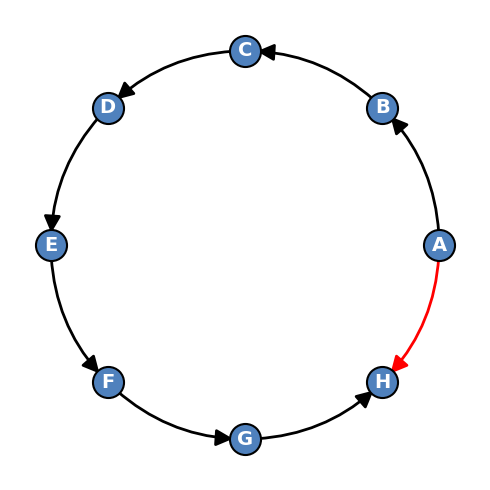

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()
num_nodes = 8

# Normal cycle edges excluding the last
edges = [(i, (i + 1) % num_nodes) for i in range(num_nodes - 1)]

# Reversed last edge: 0 → 7 (instead of 7 → 0)
reversed_edge = (0, 7)

# Add edges to graph
G.add_edges_from(edges)
G.add_edge(*reversed_edge)

# Use circular layout
pos = nx.circular_layout(G)

# Set up figure
plt.figure(figsize=(5, 5))

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_size=500,
                       node_color="#4F81BD",
                       edgecolors='black',
                       linewidths=1.5)

# Labels: A to H
labels = {i: chr(65 + i) for i in range(num_nodes)}
nx.draw_networkx_labels(G, pos, labels,
                        font_size=14,
                        font_color='white',
                        font_weight='bold')

# Draw regular black edges (with positive curvature)
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
                       edge_color='black',
                       connectionstyle='arc3,rad=0.2',
                       arrows=True,
                       arrowsize=25,
                       arrowstyle='-|>',
                       width=2)

# Draw reversed red edge along the circle with negative curvature
nx.draw_networkx_edges(G, pos,
                       #edgelist=edges,
                       edgelist=[reversed_edge],
                       edge_color='red',
                       connectionstyle='arc3,rad=-0.2',
                       arrows=True,
                       arrowsize=25,
                       arrowstyle='-|>',
                       width=2)

# Save as PDF
#plt.title("Directed Cycle with Reversed Last Edge (Curved Red)", fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig("directed_cycle_reversed_edge.pdf", format='pdf')
plt.show()


In [ ]:
# === Verify algebraic decomposition of G ===
check1 = np.round(G - J_N @ G - FrDCT, 2)
check2 = np.round(G + J_N @ G + 1j * FrDST, 2)

zero_matrix = np.zeros_like(G)
print("\n--- Decomposition Verification ---")
if np.allclose(check1, zero_matrix) and np.allclose(check2, zero_matrix):
    print("✅ G - JG = FrDCT and G + JG = -i·FrDST confirmed")
else:
    print("❌ Decomposition mismatch detected")
print("----------------------------------")

# === Construct eigenspace components ===
Eig_pos1 = (I - J_N) + FrDCT       # eigval +1
Eig_neg1 = (I - J_N) - FrDCT       # eigval -1
Eig_posi = (I + J_N) - FrDST       # eigval +i
Eig_negi = (I + J_N) + FrDST       # eigval -i

# === Verify eigenvalue equations Gv = λv ===
print("\n--- Eigenvalue Verification ---")
def check_eigvec(eig_matrix, expected, label):
    if np.allclose(G @ eig_matrix, expected * eig_matrix, atol=1e-2):
        print(f"✅ EigVecs confirmed for eigenvalue {label}")
    else:
        print(f"❌ EigVecs failed for eigenvalue {label}")

check_eigvec(Eig_pos1,  1,   "+1")
check_eigvec(Eig_neg1, -1,   "-1")
check_eigvec(Eig_posi,  1j,  "+i")
check_eigvec(Eig_negi, -1j,  "-i")
print("----------------------------------")

# === Construct normalized projection matrices ===
Proj_pos1 = (1/4) * Eig_pos1
Proj_neg1 = (1/4) * Eig_neg1
Proj_posi = (1/4) * Eig_posi
Proj_negi = (1/4) * Eig_negi

# === Check idempotence: P^2 = P ===
print("\n--- Idempotence Checks for Projectors ---")
def check_idempotent(P, label):
    if np.allclose(P @ P, P, atol=1e-2):
        print(f"✅ Proj_{{{label}}} is idempotent")
    else:
        print(f"❌ Proj_{{{label}}} is not idempotent")

check_idempotent(Proj_pos1, "+1")
check_idempotent(Proj_neg1, "-1")
check_idempotent(Proj_posi, "+i")
check_idempotent(Proj_negi, "-i")
print("------------------------------------------\n")

# === Final identity decomposition check ===
identity_operator = Proj_pos1 + Proj_neg1 + Proj_posi + Proj_negi

print("\n--- Identity Decomposition Check ---")
if np.allclose(np.eye(N), identity_operator, atol=1e-2):
    print("✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed")
else:
    print("❌ Identity cannot be decomposed into spectral projections")
print("------------------------------------------")



--- Decomposition Verification ---
✅ G - JG = FrDCT and G + JG = -i·FrDST confirmed
----------------------------------

--- Eigenvalue Verification ---
✅ EigVecs confirmed for eigenvalue +1
✅ EigVecs confirmed for eigenvalue -1
✅ EigVecs confirmed for eigenvalue +i
✅ EigVecs confirmed for eigenvalue -i
----------------------------------

--- Idempotence Checks for Projectors ---
✅ Proj_{+1} is idempotent
✅ Proj_{-1} is idempotent
✅ Proj_{+i} is idempotent
✅ Proj_{-i} is idempotent
------------------------------------------


--- Identity Decomposition Check ---
✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed
------------------------------------------


In [ ]:
# === Part 1: FrDCT Squared Identity ===
Square_FrDCT = FrDCT @ FrDCT

print("\n--- FrDCT Analysis ---")
if np.allclose(Square_FrDCT, 2 * (I - J_N), atol=1e-10):
    print("✅ FrDCT² = 2·(I - J_N) confirmed")
else:
    print("❌ FrDCT² ≠ 2·(I - J_N)")

# Eigenvalue spectrum of FrDCT
eigvals_FrDCT = np.unique(np.round(np.linalg.eigvals(FrDCT), decimals=5))
print(f"Eigenvalues of FrDCT: {eigvals_FrDCT}")
print("*" * 40)

# === Part 2: FrDST Squared Identity ===
Square_FrDST = FrDST @ FrDST

print("\n--- FrDST Analysis ---")
if np.allclose(Square_FrDST, 2 * (I + J_N), atol=1e-10):
    print("✅ FrDST² = 2·(I + J_N) confirmed")
else:
    print("❌ FrDST² ≠ 2·(I + J_N)")

# Eigenvalue spectrum of FrDST
eigvals_FrDST = np.unique(np.round(np.linalg.eigvals(FrDST), decimals=5))
print(f"Eigenvalues of FrDST: {eigvals_FrDST}")
print("*" * 40)




--- FrDCT Analysis ---
✅ FrDCT² = 2·(I - J_N) confirmed
Eigenvalues of FrDCT: [-2.+0.j -0.+0.j  2.-0.j]
****************************************

--- FrDST Analysis ---
✅ FrDST² = 2·(I + J_N) confirmed
Eigenvalues of FrDST: [-2.+0.j -0.+0.j  2.+0.j]
****************************************


In [ ]:
import numpy as np


print(P)

[[1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]]
